In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-07-13 16:37:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  74.5MB/s    in 7.1s    

2022-07-13 16:37:18 (70.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



## unzip the file

In [10]:
import zipfile

file = zipfile.ZipFile('./10_food_classes_all_data.zip')
file.extractall()

In [ ]:
!rm 10_food_classes_all_data.zip

# Get One with the data

In [14]:
import os
dirs = os.listdir('./10_food_classes_all_data/train')
dirs.pop(1)
classes = dirs

In [15]:
classes

['ice_cream',
 'chicken_curry',
 'steak',
 'sushi',
 'chicken_wings',
 'grilled_salmon',
 'hamburger',
 'pizza',
 'ramen',
 'fried_rice']

In [29]:
img_name = os.listdir('./10_food_classes_all_data/train/ice_cream')[0]
img_name

'1795168.jpg'

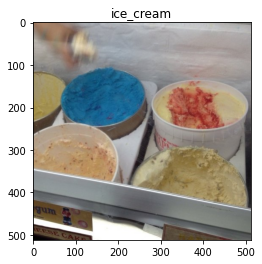

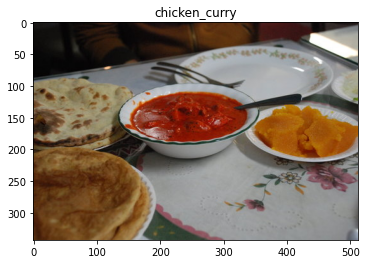

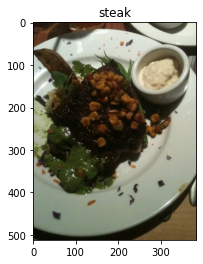

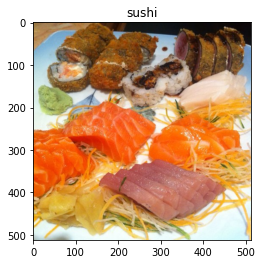

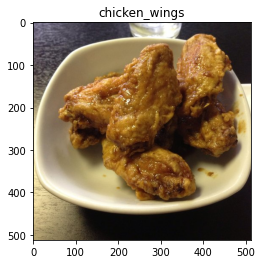

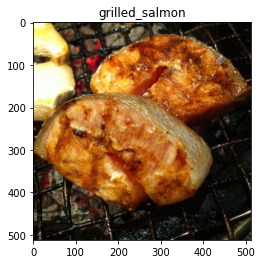

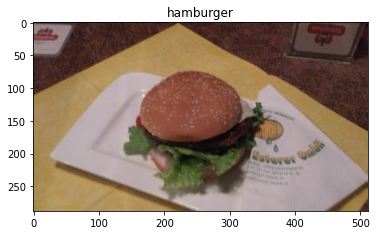

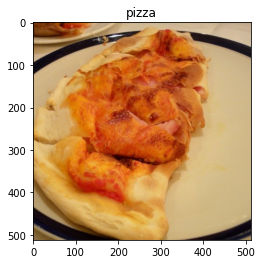

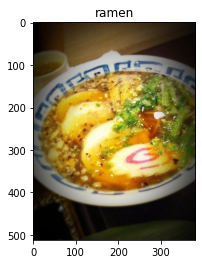

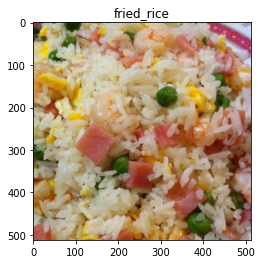

In [70]:
# lets show all the img of the related class
def show_imgs_of_related_class():
    import matplotlib.image as pltimg
    for i in range(0,len(classes)):
        img_name = os.listdir(f'10_food_classes_all_data/train/{classes[i]}/')[0]
        PATH = f'10_food_classes_all_data/train/{classes[i]}/{img_name}'
        imgtensor = pltimg.imread(PATH)
        plt.figure()
        plt.title(classes[i])
        plt.imshow(imgtensor)
        
show_imgs_of_related_class()

## Setting up normal data generator (augumentation) in tensorflow

In [140]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = '10_food_classes_all_data/train/'
TEST_DIR = '10_food_classes_all_data/test/'

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = test_datagen.flow_from_directory(TEST_DIR,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [141]:
train_data.next()[0].shape

(32, 224, 224, 3)

## building a CNN model with non-argumented data set

In [154]:
model1 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3)),
        tf.keras.layers.Activation(activation='relu'),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.MaxPool2D(),

        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.MaxPool2D(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10,activation='softmax')
])

model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model1.fit(train_data,epochs=10, steps_per_epoch=len(train_data), validation_data=validation_data, validation_steps=len(validation_data))

Epoch 1/10


2022-07-13 19:21:06.984257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.1449 - accuracy: 0.2159

2022-07-13 19:21:25.241115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 24s 100ms/step - loss: 2.1449 - accuracy: 0.2159 - val_loss: 1.9846 - val_accuracy: 0.2920
Epoch 2/10
235/235 [==============================] - 23s 98ms/step - loss: 1.8948 - accuracy: 0.3403 - val_loss: 1.9733 - val_accuracy: 0.3180
Epoch 3/10
235/235 [==============================] - 23s 98ms/step - loss: 1.6140 - accuracy: 0.4515 - val_loss: 1.9141 - val_accuracy: 0.3316
Epoch 4/10
235/235 [==============================] - 23s 95ms/step - loss: 1.0472 - accuracy: 0.6535 - val_loss: 2.2923 - val_accuracy: 0.3048
Epoch 5/10
235/235 [==============================] - 23s 98ms/step - loss: 0.4075 - accuracy: 0.8729 - val_loss: 3.2503 - val_accuracy: 0.3004
Epoch 6/10
235/235 [==============================] - 22s 95ms/step - loss: 0.1277 - accuracy: 0.9649 - val_loss: 4.5520 - val_accuracy: 0.2656
Epoch 7/10
235/235 [==============================] - 22s 95ms/step - loss: 0.0623 - accuracy: 0.9831 - val_loss: 5.4762 - val_accuracy: 0.2684
Ep

<AxesSubplot:>

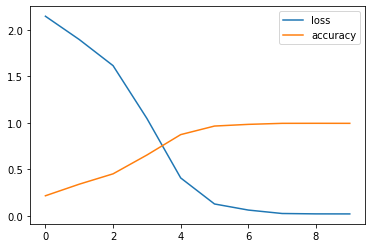

<Figure size 432x288 with 0 Axes>

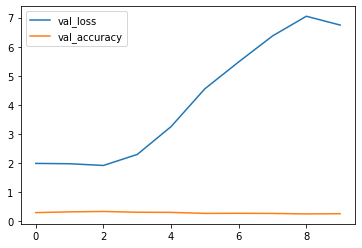

In [155]:
pd.DataFrame(model1.history.history,columns=['loss','accuracy']).plot()
plt.figure()
pd.DataFrame(model1.history.history,columns=['val_loss','val_accuracy']).plot()

## looks like our data is overfitting so augument our data

In [156]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = '10_food_classes_all_data/train/'
TEST_DIR = '10_food_classes_all_data/test/'

train_datagen = ImageDataGenerator(rescale=1/255.,rotation_range=0.2, zoom_range=0.1,shear_range=0.1)
test_datagen = ImageDataGenerator(rescale=1/255.,rotation_range=0.2, zoom_range=0.1,shear_range=0.1)

train_data_aug = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data_aug = test_datagen.flow_from_directory(TEST_DIR,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [157]:
model2 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3)),
        tf.keras.layers.Activation(activation='relu'),
        # tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.MaxPool2D(),

        # tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.MaxPool2D(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10,activation='softmax')
])

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model2.fit(train_data,epochs=10, steps_per_epoch=len(train_data), validation_data=validation_data, validation_steps=len(validation_data))

Epoch 1/10


2022-07-13 19:25:23.214721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.2011 - accuracy: 0.2200

2022-07-13 19:25:41.648849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 24s 101ms/step - loss: 2.2011 - accuracy: 0.2200 - val_loss: 1.9878 - val_accuracy: 0.2772
Epoch 2/10
235/235 [==============================] - 23s 97ms/step - loss: 1.7603 - accuracy: 0.4004 - val_loss: 1.8896 - val_accuracy: 0.3512
Epoch 3/10
235/235 [==============================] - 22s 95ms/step - loss: 1.3309 - accuracy: 0.5632 - val_loss: 1.9834 - val_accuracy: 0.3296
Epoch 4/10
235/235 [==============================] - 23s 97ms/step - loss: 0.8744 - accuracy: 0.7331 - val_loss: 2.2418 - val_accuracy: 0.3152
Epoch 5/10
235/235 [==============================] - 23s 96ms/step - loss: 0.4743 - accuracy: 0.8695 - val_loss: 2.7885 - val_accuracy: 0.2936
Epoch 6/10
235/235 [==============================] - 22s 95ms/step - loss: 0.2183 - accuracy: 0.9508 - val_loss: 3.2874 - val_accuracy: 0.2912
Epoch 7/10
235/235 [==============================] - 22s 95ms/step - loss: 0.0947 - accuracy: 0.9828 - val_loss: 3.6664 - val_accuracy: 0.2884
Ep

In [159]:
model1.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_186 (Conv2D)         (None, 222, 222, 10)      280       
                                                                 
 activation_12 (Activation)  (None, 222, 222, 10)      0         
                                                                 
 conv2d_187 (Conv2D)         (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_188 (Conv2D)         (None, 108, 108, 10)      910       
                                                                 
 conv2d_189 (Conv2D)         (None, 106, 106, 10)      910       
                                                     

In [158]:
model2.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_190 (Conv2D)         (None, 222, 222, 10)      280       
                                                                 
 activation_13 (Activation)  (None, 222, 222, 10)      0         
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_191 (Conv2D)         (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_35 (Flatten)        (None, 29160)           

## Looks like no change when removing 2 hidden layer

In [160]:
model3 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3)),
        tf.keras.layers.Activation(activation='relu'),
        # tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.MaxPool2D(),

        # tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.MaxPool2D(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10,activation='softmax')
])

model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model3.fit(train_data_aug,epochs=10, steps_per_epoch=len(train_data_aug), validation_data=validation_data_aug, validation_steps=len(validation_data_aug))

Epoch 1/10


2022-07-13 19:31:09.204871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.1798 - accuracy: 0.2215

2022-07-13 19:31:54.480679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 60s 254ms/step - loss: 2.1798 - accuracy: 0.2215 - val_loss: 1.9858 - val_accuracy: 0.2752
Epoch 2/10
235/235 [==============================] - 59s 250ms/step - loss: 1.9070 - accuracy: 0.3404 - val_loss: 1.9010 - val_accuracy: 0.3464
Epoch 3/10
235/235 [==============================] - 59s 251ms/step - loss: 1.7454 - accuracy: 0.4080 - val_loss: 1.8683 - val_accuracy: 0.3452
Epoch 4/10
235/235 [==============================] - 61s 259ms/step - loss: 1.6376 - accuracy: 0.4536 - val_loss: 1.8032 - val_accuracy: 0.3752
Epoch 5/10
235/235 [==============================] - 61s 258ms/step - loss: 1.5076 - accuracy: 0.4947 - val_loss: 1.8740 - val_accuracy: 0.3700
Epoch 6/10
235/235 [==============================] - 60s 256ms/step - loss: 1.4040 - accuracy: 0.5308 - val_loss: 1.8833 - val_accuracy: 0.3684
Epoch 7/10
235/235 [==============================] - 61s 258ms/step - loss: 1.3130 - accuracy: 0.5593 - val_loss: 1.9174 - val_accuracy: 0.3

<AxesSubplot:>

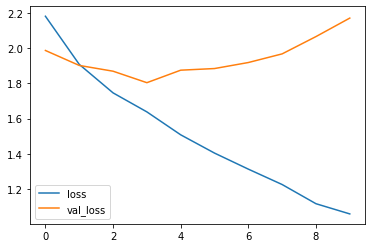

<Figure size 432x288 with 0 Axes>

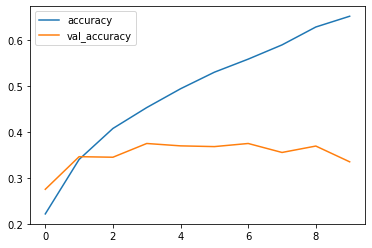

In [161]:
pd.DataFrame(model3.history.history,columns=['loss','val_loss']).plot()
plt.figure()
pd.DataFrame(model3.history.history,columns=['accuracy','val_accuracy']).plot()